1. Інсталювати та імпортувати необхідні бібліотеки. Необхідно буде інсталювати такі пакети

In [2]:
!pip install plotly==5.20.0
!pip install "jupyterlab>=3" "ipywidgets>=7.6"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
 

2. Завантажити дані з набору https://www.kaggle.com/datasets/unsdsn/world-happiness.

In [3]:
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

--2024-11-11 11:53:37--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip [following]
--2024-11-11 11:53:37--  https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/raw/refs/heads/main/WorldHappinessReport.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip [following]
--2024-11-11 11:53:37--  https://raw.githubusercontent.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/refs/heads/main/WorldHappinessReport.zip
Resolving raw.githubusercontent.com (raw.githubuserco

3. Розпакувати дані

In [4]:
!unzip WorldHappinessReport.zip

Archive:  WorldHappinessReport.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


4. Прочитати дані та відобразити загальну інформацію про статистики та типи ознак.

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px



from plotly.offline import init_notebook_mode, iplot
# plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")


from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
os.listdir('./')

['.config',
 'WorldHappinessReport.zip',
 '2018.csv',
 '2017.csv',
 '2019.csv',
 '2015.csv',
 '2016.csv',
 'sample_data']

In [51]:
happiness_df = pd.read_csv('.//2017.csv')
happiness_df

print(happiness_df.info())
print(happiness_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [52]:
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


In [53]:
happiness_df.shape

(155, 12)

In [54]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [55]:
happiness_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [57]:
import plotly.express as px

fig = px.choropleth(happiness_df,
                    locations="Country",
                    color="Happiness.Rank",
                    color_continuous_scale="YlOrRd",  # Change color scale here
                    locationmode="country names")

fig.update_layout(title="Happiness rank")
fig.show()

5. Побудувати діаграми розподілу числових ознак. Проаналізувати на відповідність чи не відповідність нормальному розподілу.

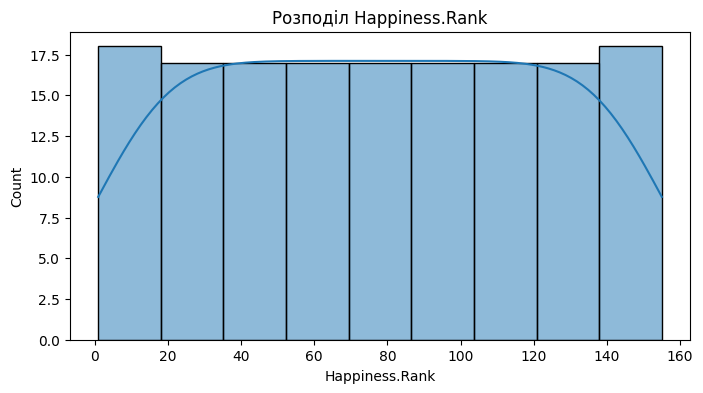

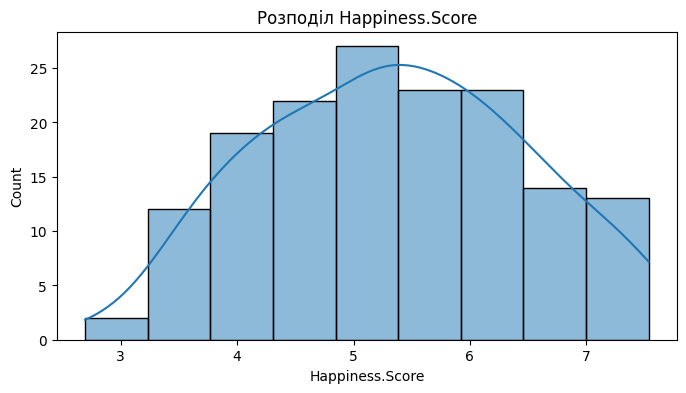

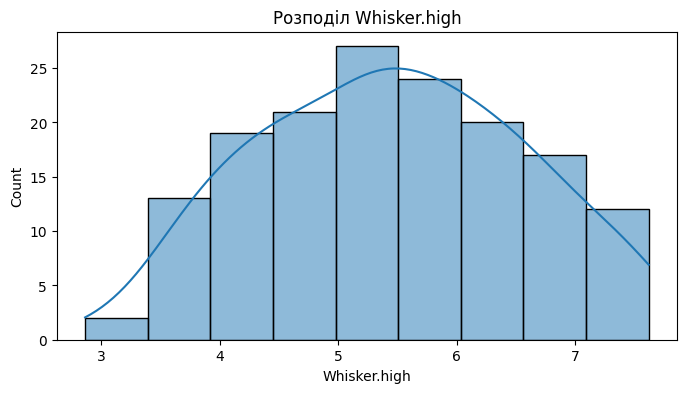

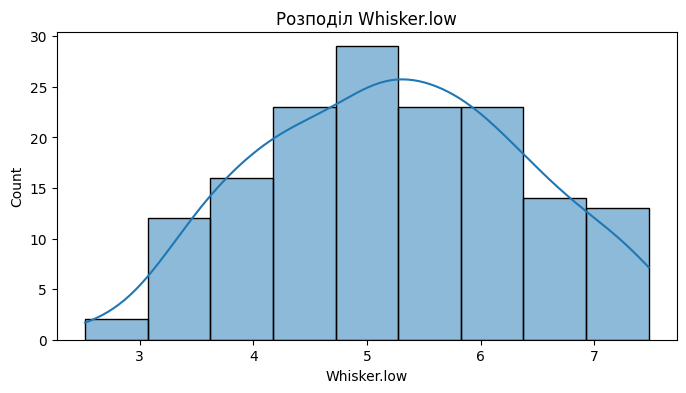

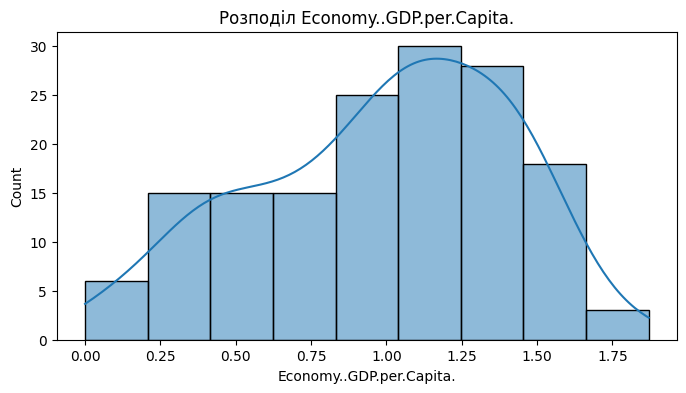

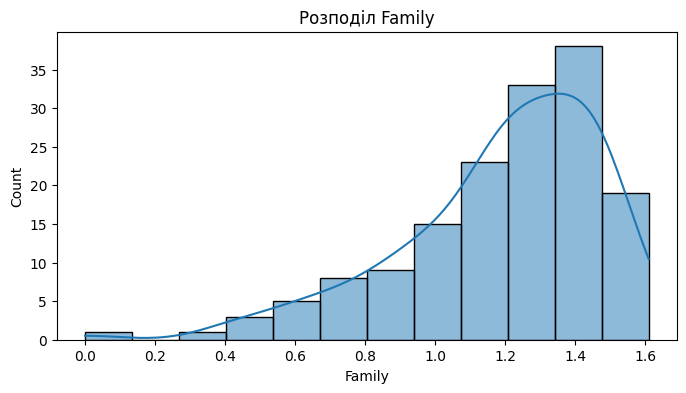

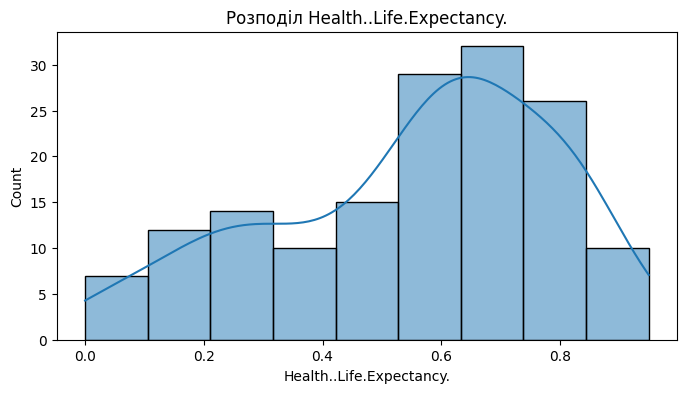

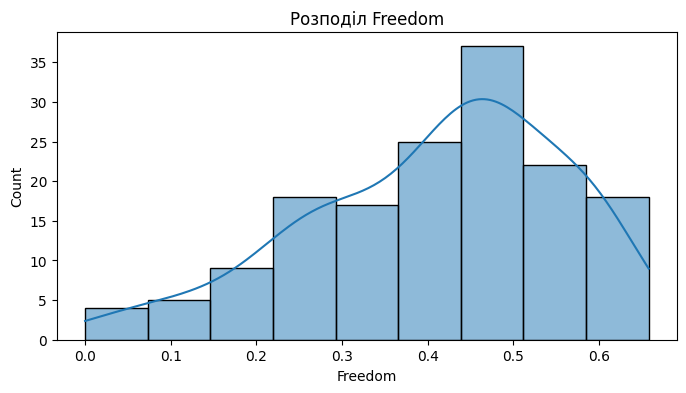

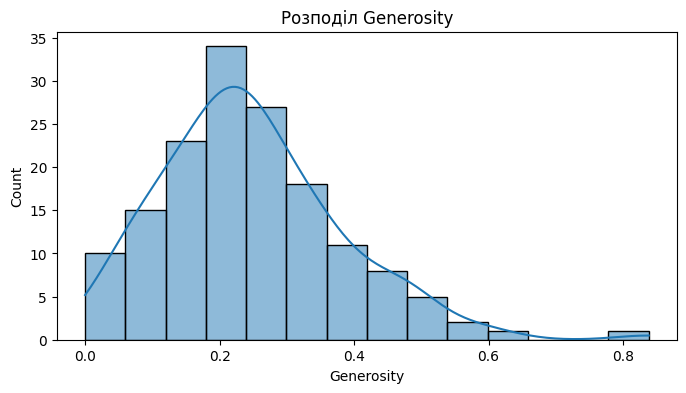

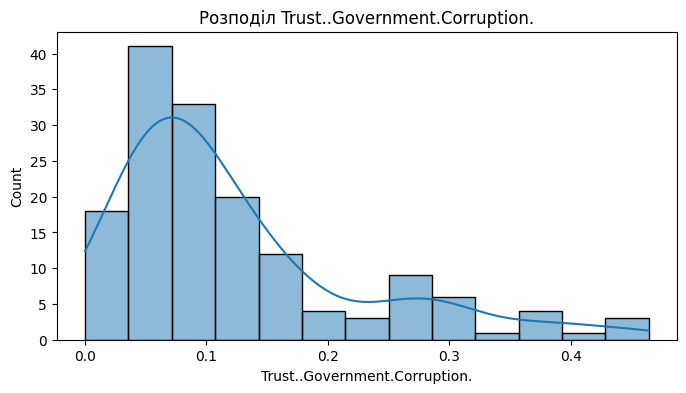

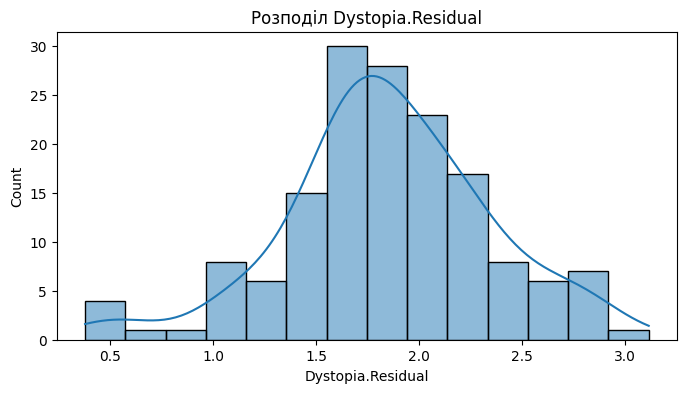

In [58]:
import seaborn as sns

numeric_columns = happiness_df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(happiness_df[col], kde=True)
    plt.title(f"Розподіл {col}")
    plt.show()

6. Виходячи із розуміння домену та даних відібрати певну кількість числових ознак та відобразити кореляційну матрицю (див. Тема 4. Вимірювання відстаней та подібностей в аналізі даних)

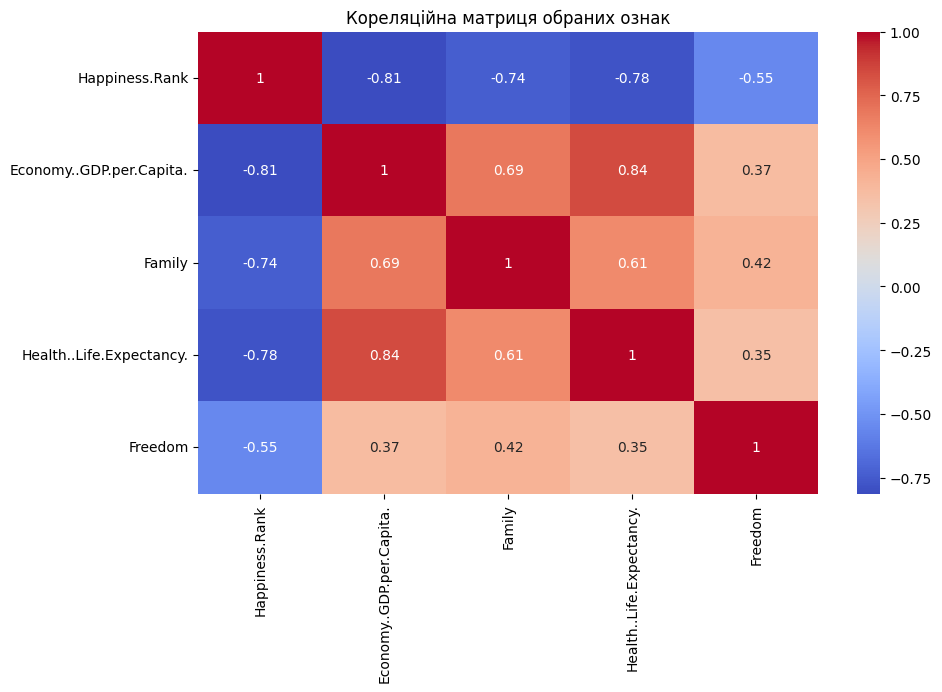

In [59]:
selected_columns = ['Happiness.Rank', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom']
correlation_matrix = happiness_df[selected_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця обраних ознак")
plt.show()

7. Зробити висновок про наявність та силу лінійного зв'язку між ознаками.

На основі кореляційної матриці можна зробити висновок що високий рівень кореляції між Happiness Score та Economy (GDP per Capita), а також Health Life Expectancy може свідчити про значний вплив економіки та рівня здоров'я на рівень щастя.

8. Відобразити розподіл цільової ознаки (Happiness.Score або Happiness.Rank) за країнами. Використовуючи наведений нижче код для побудови теплової мапи.

In [60]:
fig = px.choropleth(happiness_df,
                    locations = "Country",
                    color = "Happiness.Score",
                    locationmode = "country names",
                    )
fig.update_layout(title = "Happiness Index")
fig.show()

9. Застосувати стандартизацію даних для приведення всіх значень до одного діапазону статистик. Використовуючи функцію data_scale() та наступні перетворення

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

def data_scale(data, scaler_type='minmax'):
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

# Стандартизуємо дані
numeric_data = happiness_df.select_dtypes(include='number')
data_scaled = data_scale(numeric_data, scaler_type='std')
df_scaled = pd.DataFrame(data_scaled, columns=numeric_data.columns)

print(df_scaled.describe())

       Happiness.Rank  Happiness.Score  Whisker.high   Whisker.low  \
count    1.550000e+02     1.550000e+02    155.000000  1.550000e+02   
mean     9.168293e-17    -2.750488e-16      0.000000  1.833659e-16   
std      1.003241e+00     1.003241e+00      1.003241  1.003241e+00   
min     -1.720912e+00    -2.359949e+00     -2.320726 -2.395974e+00   
25%     -8.604561e-01    -7.525169e-01     -0.757138 -7.716943e-01   
50%      0.000000e+00    -6.653176e-02     -0.073811 -5.481445e-02   
75%      8.604561e-01     6.629099e-01      0.665760  6.578411e-01   
max      1.720912e+00     1.935996e+00      1.946050  1.948466e+00   

       Economy..GDP.per.Capita.        Family  Health..Life.Expectancy.  \
count              1.550000e+02  1.550000e+02              1.550000e+02   
mean              -2.750488e-16  3.667317e-16             -2.292073e-16   
std                1.003241e+00  1.003241e+00              1.003241e+00   
min               -2.347736e+00 -4.152125e+00             -2.333157e+

10. Відобразити статистики отриманого стандартизованого набору даних та порівняти зі статистиками оригінального набору даних. Зробити висновки.

In [64]:
# Статистики оригінального набору даних
print("Статистики оригінального набору даних:")
print(happiness_df.describe())

# Статистики стандартизованого набору даних
print("\nСтатистики стандартизованого набору даних:")
print(df_scaled.describe())

Статистики оригінального набору даних:
       Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000    

1. Середнє значення (mean)
Оригінальний набір даних: Середні значення різні для кожної ознаки (наприклад, середнє значення для Happiness.Score становить приблизно 5.35, для Economy..GDP.per.Capita. — 0.98, для Dystopia.Residual — 1.85).
Стандартизований набір даних: Після стандартизації середні значення всіх ознак наближені до нуля (або мають незначні значення, близькі до нуля, які є результатом числових похибок). Це свідчить про ефективність стандартизації, яка зсунула значення ознак до нуля.
2. Стандартне відхилення (std)
Оригінальний набір даних: Стандартне відхилення ознак значно різниться, наприклад, для Happiness.Score воно становить 1.13, а для Generosity — 0.13.
Стандартизований набір даних: Стандартне відхилення кожної ознаки стало близьким до 1 (наприклад, 1.003 для всіх ознак), що підтверджує, що ознаки були успішно масштабовані до однакової шкали.
3. Мінімальні та максимальні значення (min, max)
Оригінальний набір даних: Мінімальні та максимальні значення для кожної ознаки відрізняються залежно від їх масштабу. Наприклад, для Happiness.Score значення змінюються від 2.69 до 7.54, а для Trust..Government.Corruption. — від 0 до 0.46.
Стандартизований набір даних: Мінімальні та максимальні значення для кожної ознаки тепер перебувають у значеннях, близьких до -3 і 3, оскільки стандартизація зсунула і розтягнула розподіл до стандартного нормального розподілу.
4. Розподіл значень (квартилі - 25%, 50%, 75%)
Оригінальний набір даних: Квартилі в оригінальних даних значно варіюються для різних ознак, що відображає вихідний розподіл значень.
Стандартизований набір даних: Квартилі після стандартизації мають подібні значення для всіх ознак, оскільки тепер значення масштабовані на основі відхилень від середнього.
Висновок
Після стандартизації кожна ознака тепер має середнє значення, близьке до нуля, і стандартне відхилення, близьке до одиниці, що робить їх співмірними. Це полегшує подальший аналіз, зокрема кластеризацію та інші алгоритми, чутливі до різниці в масштабах ознак, оскільки тепер усі ознаки мають однаковий масштаб.

11. Побудувати модель кластеризації засобами функції GaussianMixture() бібліотеки sklearn.

In [62]:
from sklearn.mixture import GaussianMixture

# Обираємо кількість кластерів
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=0)

# Навчаємо модель
gmm.fit(data_scaled)
clusters = gmm.predict(data_scaled)

# Додаємо кластери до початкового набору даних
happiness_df['Cluster'] = clusters

12. Побудувати теплову мапу для відображення розподілу країн за кластерами.

In [63]:
fig = px.choropleth(happiness_df,
                    locations="Country",
                    color="Cluster",
                    locationmode="country names")
fig.update_layout(title="Кластеризація країн за рівнем щастя")
fig.show()

13. Дослідити вплив різного набору ознак на результат кластеризації.

In [66]:
from sklearn.mixture import GaussianMixture

n_clusters = 2 # спробувала розділити на 3 кластери по типу розвинуті країни; країни, що розвиваються; найменш розвинуті країни
gmm = GaussianMixture(n_components=n_clusters)
gmm.fit(data_scaled[:, :1])
clusters = gmm.predict(data_scaled[:, :1])
happiness_df['Cluster'] = clusters

In [67]:
fig = px.choropleth(happiness_df,
                    locations="Country",
                    color="Cluster",
                    locationmode="country names")
fig.update_layout(title="Кластеризація країн за рівнем щастя")
fig.show()

14. Зробити загальний висновок про відповідність результатів кластеризації оригінальному розподілу країн за ознакою

Я вважаю, що отримані кластери відповідають реальному розподілу країн за рівнем щастя.